In [1]:
import numpy as np
import pandas as pd

In [2]:
class Bayes_Classifier:
    def __init__(self, outlook, temp, humidity, windy, play_golf):
        self.carrega_tabela("naive_bayes_classificador.csv")
        self.outlook = self.probability_select_class(outlook, 'Target', play_golf)[1]
        self.temp = self.probability_select_class(temp, 'Target', play_golf)[1]
        self.humidity = self.probability_select_class(humidity, 'Target', play_golf)[1]
        self.windy = self.probability_select_class(windy, 'Target', play_golf)[1]
        self.play_golf = self.calculate_prior('Target')[0][play_golf]

    def carrega_tabela(self, tabela):
        self.csv = pd.read_csv(tabela, sep=',')

    def view_table(self):
      return self.csv

    def likehood(self, coluna):
      tabela = self.csv
      total_target_total = len(tabela[coluna])
      labels = sorted(list(tabela[coluna].unique()))
      likelihoodx = None
      likelihoodx = [1]*len(labels)
      return likelihoodx

    def probability_select(self, prob_nome_coluna, label, prob_target, value_target ):
        tabela = self.csv
        tabelax = tabela[tabela[prob_nome_coluna]==label]
        k = tabelax[prob_target]
        x = tabela[tabela[prob_target]==value_target]
        calc = len(tabelax[k==value_target])/len(x) if len(tabelax[k==value_target]) != 0 else 0
        return (tabelax, calc, len(tabelax[k==value_target]), len(x))
    
    def probability_select_class(self, label, prob_target, value_target):
        tabela = self.csv
        prob_nome_coluna = None
        for i in list(tabela.columns):
          if label in sorted(list(tabela[i].unique())):
            prob_nome_coluna = i
        tabelax = tabela[tabela[prob_nome_coluna]==label]
        k = tabelax[prob_target]
        x = tabela[tabela[prob_target]==value_target]
        calc = len(tabelax[k==value_target])/len(x) if len(tabelax[k==value_target]) != 0 else 0
        return (tabelax, calc, len(tabelax[k==value_target]), len(x))

    def calculate_prior(self, Y):
        tabela = self.csv
        classes = sorted(list(tabela[Y].unique()))
        new_dic = dict()
        for i in classes:
          new_dic.update({i: len(tabela[tabela[Y]==i])/len(tabela)})
        return new_dic, tabela
    
    def result_probability(self):
      print("Genero", self.outlook)
      print("Idade", self.temp)
      print("Escolaridade", self.humidity)
      print("Profissao", self.windy)
      print("Target", self.play_golf)

      return (self.outlook*self.temp*self.humidity*self.windy*self.play_golf)


In [3]:
a = Bayes_Classifier("F","b - 26 a 35 anos","Fundamental","b",1)
print("TOTAL", a.result_probability())

Genero 0.6036269430051814
Idade 0.29404145077720206
Escolaridade 0.4896373056994819
Profissao 0.4430051813471503
Target 0.772
TOTAL 0.029721982817078794


Index(['Genero', 'Idade', 'Escolaridade', 'Profissao', 'Target'], dtype='object')
AxesSubplot(0.125,0.125;0.775x0.755)


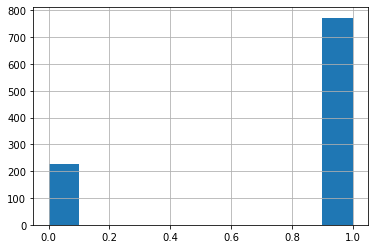

In [5]:
print(a.view_table().columns)
print(a.csv['Genero'].hist())


AxesSubplot(0.125,0.125;0.775x0.755)


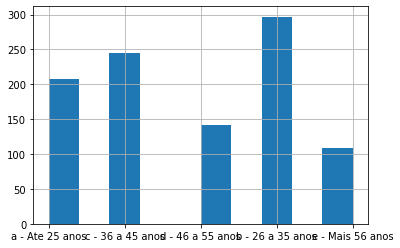

In [6]:
print(a.csv['Idade'].hist())


AxesSubplot(0.125,0.125;0.775x0.755)


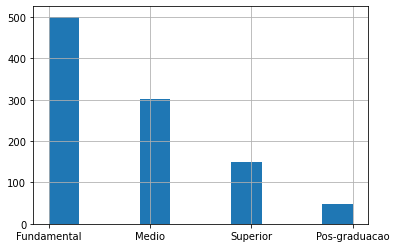

In [9]:
print(a.csv['Escolaridade'].hist())


AxesSubplot(0.125,0.125;0.775x0.755)


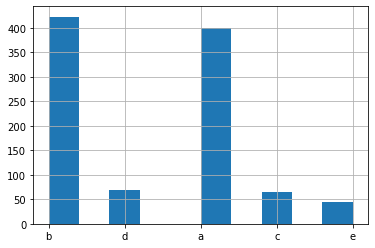

In [8]:
print(a.csv['Profissao'].hist())